In [1]:
import sys
sys.path.append('../../')

from src.pyRadar.dataPaths import *
import src.pyRadar.pyRadar as pr


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# pyRadar

This file try to explain how to use the pyRadar functions.

The file will follow a seuence of logic a steps since read the data radar, processing the data, save as radar format and plot some of the results.

## Read the data

Fisrt we obtain the path to the data, to do that we need to know the path where the data are. 

We gona use two functions, the firs one let us to know the path where the data are and the second one give us a dictionary structure that organize the data by year, month and day

In [2]:
paths= pr.get_path_files( path2root, 'QRO_\d{4}' )
print(paths)

['/home/arielcg/QRO_2015', '/home/arielcg/QRO_2016', '/home/arielcg/QRO_2017']


In [3]:
files= pr.get_files_from_path( paths[0] )
print( type(files) )
print( "Months: ", files.keys() )
print( "Days of the first month with data: ", files['06'].keys())
print( "Some paths of files for the first day: ", files[ '06' ]['01'][:10])

<class 'dict'>
Months:  dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'])
Days of the first month with data:  dict_keys(['01', '05', '06', '07', '08', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'])
Some paths of files for the first day:  ['/home/arielcg/QRO_2015/RAW_NA_000_236_20150601000108', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601000608', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601001109', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601001609', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601002108', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601002608', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601003109', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601003609', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601004109', '/home/arielcg/QRO_2015/RAW_NA_000_236_20150601004609']


We can read the data in two way, the fisrt one is using wradlib in that case we gona get a iris OrderDict, in the second way is using pyArt and we get a radar object.

If we gona do some processing in the data, I recomend using wradlib, but if we gona plot some infomation pyArt has more easier functions.

In [6]:
filename= files['06']['01'][0]

In [7]:
iris= pr.get_iris( filename )
print( type( iris)  )

<class 'collections.OrderedDict'>


In [8]:
radar= pr.get_radar( filename )
print( type( radar ) )
print( radar.info() )

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (360,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (360,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	total_power:
		data: <ndarray of type: float32 and shape: (360, 921)>
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		long_name: Total power
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	reflectivity:
		data: <ndarray of type: float32 and shape: (360, 921)>
		units: dBZ
		stan

# Processing

In the docs of wradlib they have a usually path to proccessing data, this path can be use in one function.
This processing include a clutter filter, and a pia cleaner, also we can call this functions.

In [12]:
dBZ, pia= pr.data_processing_chain( iris )
print( dBZ, pia )


[[-32.  -32.  -20.5 ... -32.  -32.  -32. ]
 [-32.  -23.  -19.5 ... -32.  -32.  -32. ]
 [-20.  -16.5 -16.5 ... -32.  -32.  -32. ]
 ...
 [-18.5 -16.  -12.5 ... -32.  -32.  -32. ]
 [-12.  -10.5  -8.5 ... -32.  -32.  -32. ]
 [-32.  -32.  -20.5 ... -32.  -32.  -32. ]] [[0.00000000e+00 1.92196939e-06 3.84393938e-06 ... 2.15294300e-01
  2.15296289e-01 2.15298279e-01]
 [0.00000000e+00 1.92196939e-06 1.01206997e-05 ... 1.88562582e-01
  1.88564564e-01 1.88566545e-01]
 [0.00000000e+00 1.32967795e-05 3.66715523e-05 ... 2.51586973e-01
  2.51588975e-01 2.51590976e-01]
 ...
 [0.00000000e+00 1.69334897e-05 4.22700498e-05 ... 1.10750084e-02
  1.10769338e-02 1.10788592e-02]
 [0.00000000e+00 4.82776883e-05 1.09759952e-04 ... 4.09035557e-03
  4.09227881e-03 4.09420204e-03]
 [0.00000000e+00 1.92196939e-06 3.84393938e-06 ... 1.80428314e-02
  1.80447590e-02 1.80466865e-02]]


We process the reflectivity data, but we can get the rainfall. For this we need to know the a, b constanst 

In [14]:
velocity= pr.get_velocity( iris )
rainfall= pr.reflectivity_to_rainfall( dBZ + pia, velocity )
print( rainfall )

[[0.00000000e+00 0.00000000e+00 7.85185331e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.13210312e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [2.09412178e-04 0.00000000e+00 3.31065035e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.61728444e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


# Plot

Now if we can see the data, the library has some plot functions

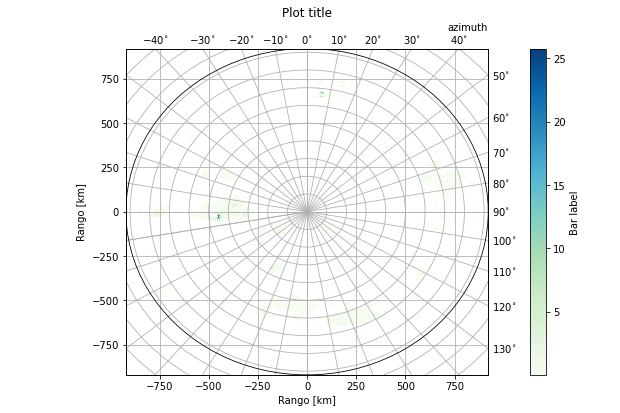

In [15]:
pr.plot_reflectivity( rainfall, "Plot title", "Bar label", "filename" )

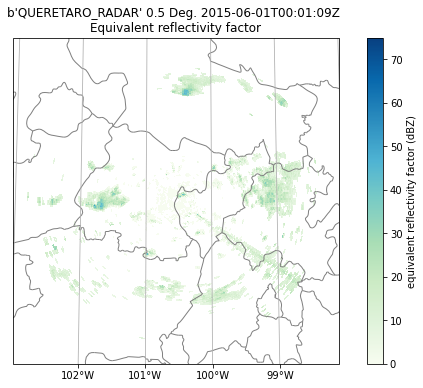

In [19]:
pr.plot_reflectivity( radar, "Radar plot", "filename", radarFrom=True)